This notebook contains the network analysis of borrowing patterns among the author-members of the Shakespeare and Company lending library. The networks are constructed by connecting two author-members if they have borrowed books from the library. The networks are then analyzed to identify the most influential author-members and communities of author-members.

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx

In [138]:
member_is_author = pd.read_csv('../data/processed/table-data/01_member_is_author.csv', encoding='utf-8')
events = pd.read_csv('../data/raw/SCoData_events_v1.2_2022_01.csv', encoding='utf-8', low_memory=False)
books = pd.read_csv('../data/raw/SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})

In [139]:
member_is_author.columns

Index(['uri', 'name', 'sort_name', 'title', 'gender', 'is_organization',
       'has_card', 'birth_year', 'death_year', 'membership_years', 'viaf_url',
       'wikipedia_url', 'nationalities', 'addresses', 'postal_codes',
       'arrondissements', 'coordinates', 'notes', 'updated'],
      dtype='object')

In [140]:
events.columns

Index(['event_type', 'start_date', 'end_date', 'member_uris', 'member_names',
       'member_sort_names', 'subscription_price_paid', 'subscription_deposit',
       'subscription_duration', 'subscription_duration_days',
       'subscription_volumes', 'subscription_category',
       'subscription_purchase_date', 'reimbursement_refund', 'borrow_status',
       'borrow_duration_days', 'purchase_price', 'currency', 'item_uri',
       'item_title', 'item_volume', 'item_authors', 'item_year', 'item_notes',
       'source_type', 'source_citation', 'source_manifest', 'source_image'],
      dtype='object')

In [141]:
books.columns

Index(['uri', 'title', 'author', 'editor', 'translator', 'introduction',
       'illustrator', 'photographer', 'year', 'format', 'uncertain',
       'ebook_url', 'volumes_issues', 'notes', 'event_count', 'borrow_count',
       'purchase_count', 'circulation_years', 'updated'],
      dtype='object')

## Network Analysis

### Common Borrows by Author-Members (All Books)

In [142]:
# Member borrows Author

# Filter events to include only those where the member is an author and the event type is 'Borrow'
member_borrows_author = events[(events['member_sort_names'].isin(member_is_author['sort_name'])) & (events['event_type'] == 'Borrow')]

print(member_borrows_author.member_sort_names.unique())

['Joyce, James' 'Hemingway, Ernest' 'Schlumberger, Jean' 'Beach, Sylvia'
 'Stein, Gertrude' 'Larbaud, Valery' 'McAlmon, Robert' 'Wilson, Romer'
 'Aragon, Louis' 'Rodker, John' 'Wilder, Thornton' 'Pound, Ezra'
 'Mansfield, Katherine' 'Solano, Solita' 'de Lanux, Pierre' 'Tree, Iris'
 'Wickham, Anna' 'Wilson, Margaret' 'Le Gallienne, Richard'
 'Gilbert, Stuart' 'Boyd, James' 'Flandrau, Grace'
 'Porter, Katherine Anne' 'Lewisohn, Ludwig' 'Tate, Allen'
 'Gascoyne, David' 'Connolly, Cyril' 'Merrick, Leonard'
 'Dennis, Mary Cable' 'Rogers, Samuel' 'Guilloux, Louis'
 'Gramont, Élisabeth de' 'Ford, Ford Madox' 'Paul, Elliot'
 'Michaux, Henri' 'Wright, Richard' 'Gide, André']


In [143]:
# Member borrows Member

# Filter events from the previous table to include only those where the author is a member
member_borrows_member = member_borrows_author[member_borrows_author.item_authors.isin(member_is_author.sort_name)]

print(member_borrows_member.member_sort_names.unique())

['Joyce, James' 'Hemingway, Ernest' 'Beach, Sylvia' 'Wilson, Romer'
 'Aragon, Louis' 'Stein, Gertrude' 'Rodker, John' 'Mansfield, Katherine'
 'Solano, Solita' 'de Lanux, Pierre' 'Wickham, Anna'
 'Le Gallienne, Richard' 'Gilbert, Stuart' 'Porter, Katherine Anne'
 'Connolly, Cyril' 'Gascoyne, David' 'Dennis, Mary Cable'
 'Merrick, Leonard' 'Rogers, Samuel' 'Ford, Ford Madox' 'Paul, Elliot']


In [144]:
def create_pivot_table(data, index, columns, values=None, aggfunc='size', fill_value=0):
    """
    Creates a pivot table from a DataFrame.

    Parameters:
    - data (pd.DataFrame): The input DataFrame.
    - index (str): The column to use as rows in the pivot table.
    - columns (str): The column to use as columns in the pivot table.
    - values (str or None): The column to aggregate. Default is None for count aggregation.
    - aggfunc (str or function): The aggregation function to apply. Default is 'size'.
    - fill_value (scalar): The value to use for missing data. Default is 0.

    Returns:
    - pd.DataFrame: The resulting pivot table.
    """
    return data.pivot_table(index=index, columns=columns, values=values, aggfunc=aggfunc, fill_value=fill_value)

In [145]:
# Matrix generation | Member borrows Author

member_borrows_author_matrix = create_pivot_table(
    data=member_borrows_author, 
    index='member_sort_names', 
    columns='item_title'
)

print(member_borrows_author_matrix)

item_title              A Bookman's Daybook  A Companion Volume  \
member_sort_names                                                 
Aragon, Louis                             0                   0   
Beach, Sylvia                             0                   0   
Boyd, James                               0                   0   
Connolly, Cyril                           0                   0   
Dennis, Mary Cable                        0                   0   
Flandrau, Grace                           0                   0   
Ford, Ford Madox                          0                   0   
Gascoyne, David                           0                   0   
Gide, André                               0                   0   
Gilbert, Stuart                           0                   0   
Gramont, Élisabeth de                     0                   0   
Guilloux, Louis                           0                   0   
Hemingway, Ernest                         1                   

In [146]:
# Matrix generation | Member borrows Member

member_borrows_member_matrix = create_pivot_table(
    data=member_borrows_member, 
    index='member_sort_names', 
    columns='item_title'
)

print(member_borrows_member_matrix)

item_title              A Companion Volume  A Farewell to Arms  A Good Woman  \
member_sort_names                                                              
Aragon, Louis                            0                   0             0   
Beach, Sylvia                            0                   0             0   
Connolly, Cyril                          0                   0             0   
Dennis, Mary Cable                       0                   0             0   
Ford, Ford Madox                         0                   0             0   
Gascoyne, David                          0                   0             0   
Gilbert, Stuart                          0                   0             0   
Hemingway, Ernest                        0                   0             0   
Joyce, James                             0                   0             0   
Le Gallienne, Richard                    0                   1             0   
Mansfield, Katherine                    

For reusability purposes, the matrix tables are saved as a pickle file. More on the file format can be read in the official [Python documentation](https://web.archive.org/web/20250112160715/https://docs.python.org/3/library/pickle.html).

In [147]:
member_borrows_author_matrix.to_pickle(
    '../data/processed/network-matrices/04_member_borrows_author.pkl'
)

In [148]:
member_borrows_member_matrix.to_pickle(
    '../data/processed/network-matrices/04_member_borrows_member.pkl'
)

In [149]:
def compute_borrow_counts(matrix, top_n=25):
    """
    Computes the total borrow count for each book and displays the top borrowed books.

    Parameters:
        matrix (DataFrame): The user-book or member-book matrix.
        books (DataFrame): The books dataset containing 'title', 'author', and 'format' columns.
        top_n (int): Number of top borrowed books to display.

    Returns:
        DataFrame: A DataFrame with columns ['book_title', 'author', 'borrow_count'] sorted by borrow count.
    """
    # Sum the borrow counts across all users/members
    borrow_counts = matrix.sum(axis=0).reset_index()
    borrow_counts.columns = ['book_title', 'borrow_count']
    
    # Merge with the books dataset to include the author column
    borrow_counts = borrow_counts.merge(books[['title', 'author']], left_on='book_title', right_on='title', how='left')
    borrow_counts = borrow_counts[['book_title', 'author', 'borrow_count']]
    
    # Display the top N most borrowed books
    top_borrowed = borrow_counts.sort_values(by='borrow_count', ascending=False).head(top_n)
    
    return top_borrowed

In [150]:
# Top borrowed books | Member borrows Author

counts_member_borrows_author = compute_borrow_counts(member_borrows_author_matrix).reset_index(drop=True)

print(counts_member_borrows_author)

# Save the counts to a CSV file
counts_member_borrows_author.to_csv(
    '../data/processed/table-data/04_member_borrows_author_counts.csv',
    encoding='utf-8'
)

                                           book_title  \
0                       Saturday Review of Literature   
1                                          transition   
2                           Thomas De Quincey's Works   
3                                            The Dial   
4             A Portrait of the Artist as a Young Man   
5                                          New Masses   
6                                        Hound & Horn   
7                                               Broom   
8                    The Symposium: A Critical Review   
9                                  A Companion Volume   
10                                   The New Republic   
11                                        Three Lives   
12                                      Warrant for X   
13               The Autobiography of Alice B. Toklas   
14                                       And Even Now   
15  The Works of Sterne: The Life and Opinions of ...   
16                             

In [151]:
# Top borrowed books | Member borrows Member

counts_member_borrows_member = compute_borrow_counts(member_borrows_member_matrix).reset_index(drop=True)

print(counts_member_borrows_member)

# Save the counts to a CSV file
counts_member_borrows_member.to_csv(
    '../data/processed/table-data/04_member_borrows_member_counts.csv',
    encoding='utf-8'
)

                                           book_title                  author  \
0             A Portrait of the Artist as a Young Man            Joyce, James   
1                                  A Companion Volume         McAlmon, Robert   
2                The Autobiography of Alice B. Toklas         Stein, Gertrude   
3                                         Three Lives         Stein, Gertrude   
4                                  A Mirror to France        Ford, Ford Madox   
5   To Return to Yesterday: Reminiscences 1894 – 1914        Ford, Ford Madox   
6   Back to Montparnasse: Glimpses of Broadway in ...      Huddleston, Sisley   
7               Oscar Wilde: His Life and Confessions           Harris, Frank   
8                              Death in the Afternoon       Hemingway, Ernest   
9                 Distinguished Air: Grim Fairy Tales         McAlmon, Robert   
10                              This Side of Paradise    Fitzgerald, F. Scott   
11                          

In the following, the members that borrowed a specific title can be extracted.

In [152]:
# Members by Title | Member borrows Author

# extract the members that borrowed a specific title
member_borrows_author_matrix[member_borrows_author_matrix['Three Lives'] > 0].index

Index(['Hemingway, Ernest', 'Joyce, James', 'Mansfield, Katherine'], dtype='object', name='member_sort_names')

In [153]:
def create_intersection_graph(matrix, threshold=0):
    """
    Creates a graph based on the intersection of borrowed items between users.

    Parameters:
    - matrix (pd.DataFrame): A DataFrame where rows represent users and columns represent items.
      Values indicate whether a user borrowed an item (e.g., binary or count values).
    - threshold (int): Minimum number of common items required to create an edge.

    Returns:
    - nx.Graph: A NetworkX graph where nodes are users and edges are weighted by the count of common items.
    """
    # Create an empty graph
    H = nx.Graph()

    # Add nodes and edges based on the intersection of borrowed items
    for user1 in matrix.index:
        for user2 in matrix.index:
            if user1 != user2:
                # Calculate intersection of items borrowed by both users
                common_items = sum((matrix.loc[user1] > 0) & (matrix.loc[user2] > 0))
                if common_items > threshold:
                    H.add_edge(user1, user2, weight=common_items)

    return H

Next the individual graphs are created and the number of edges and nodes is calculated.

In [154]:
# Graph generation | Member borrows Author

member_borrows_author_graph = create_intersection_graph(member_borrows_author_matrix)
print("Graph 'Member borrows Author' - Number of nodes:", member_borrows_author_graph.number_of_nodes())
print("Graph 'Member borrows Author' - Number of edges:", member_borrows_author_graph.number_of_edges())

Graph 'Member borrows Author' - Number of nodes: 25
Graph 'Member borrows Author' - Number of edges: 58


In [155]:
# Graph generation | Member borrows Member

member_borrows_member_graph = create_intersection_graph(member_borrows_member_matrix)
print("Graph 'Member borrows Member' - Number of nodes:", member_borrows_member_graph.number_of_nodes())
print("Graph 'Member borrows Member' - Number of edges:", member_borrows_member_graph.number_of_edges())

Graph 'Member borrows Member' - Number of nodes: 14
Graph 'Member borrows Member' - Number of edges: 18


In this network, each node (person) represents an individual who borrowed books.
An edge between two nodes indicates that these two individuals have borrowed at least one book in common.

In [156]:
def plot_network(X, use_weight=True, k=None, titleAdd=None, node_color='thistle', label_weights=False, figure_name=None):
    """
    Plots a graph with optional edge weights and customizable node colors.

    Parameters:
    - X (networkx.Graph): The input graph.
    - use_weight (bool): If True, scales edge widths by the weight attribute.
    - k (float): The optimal distance between nodes for the layout.
    - titleAdd (str): Additional text for the title.
    - node_color (str or list): The color of the nodes. Can be a single color or a list of colors.
    - label_weights (bool): If True, labels the edges with their weights.
    """
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(X, seed=42, k=k)

    # Check if node_color is a list/array (i.e., for clustering) or a single color
    if isinstance(node_color, str):
        # Use a single color for all nodes
        nx.draw_networkx_nodes(X, pos, node_size=600, node_color=node_color)
    else:
        # Use colormap for clustering
        nx.draw_networkx_nodes(X, pos, node_size=600, node_color=node_color, cmap=plt.cm.viridis)

    if use_weight:
        weights = [X[u][v].get('weight', 1) for u, v in X.edges()]
        nx.draw_networkx_edges(X, pos, width=weights, alpha=0.5)
    else:
        nx.draw_networkx_edges(X, pos, alpha=0.5)

    # Draw labels with a bounding box to avoid overlap
    labels = nx.draw_networkx_labels(X, pos, font_size=10, font_family='sans-serif',
                                     bbox=dict(facecolor='white', boxstyle='round,pad=0.3'))

    # Adjust label positions to avoid overlap
    for _, t in labels.items():
        t.set_bbox(dict(facecolor='white', boxstyle='round,pad=0.3', alpha=0.7, edgecolor='none'))

    # Optionally label the weights on the edges
    if label_weights:
        edge_labels = nx.get_edge_attributes(X, 'weight')
        nx.draw_networkx_edge_labels(X, pos, edge_labels=edge_labels, font_size=10, bbox=dict(facecolor='white', edgecolor='none', alpha=0.6))

    # Ensure all labels are visible and not cut off by the border
    plt.margins(0.1)
    plt.title(titleAdd, fontsize=16, fontweight='bold')
    # Disable the grid
    plt.grid(False)
    plt.tight_layout()

    plt.savefig(f'../data/processed/figure-images/04_graph_{figure_name}.png',bbox_inches='tight')

    plt.show()

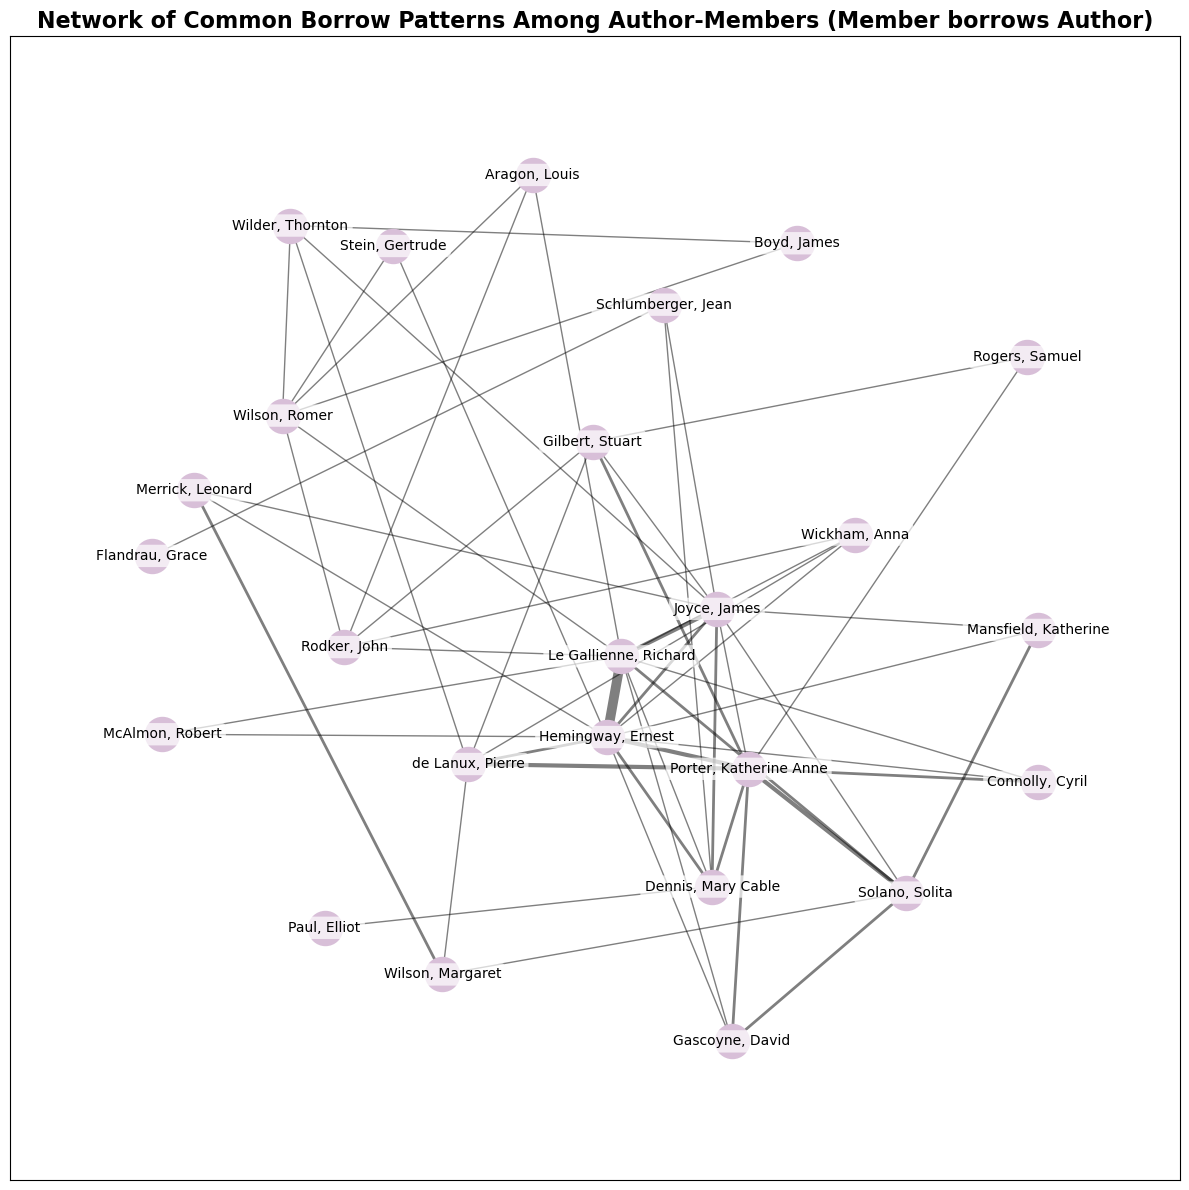

In [157]:
# Network visualization | Member borrows Author

plot_network(member_borrows_author_graph, k=1.7, titleAdd='Network of Common Borrow Patterns Among Author-Members (Member borrows Author)',figure_name='member_borrows_author')

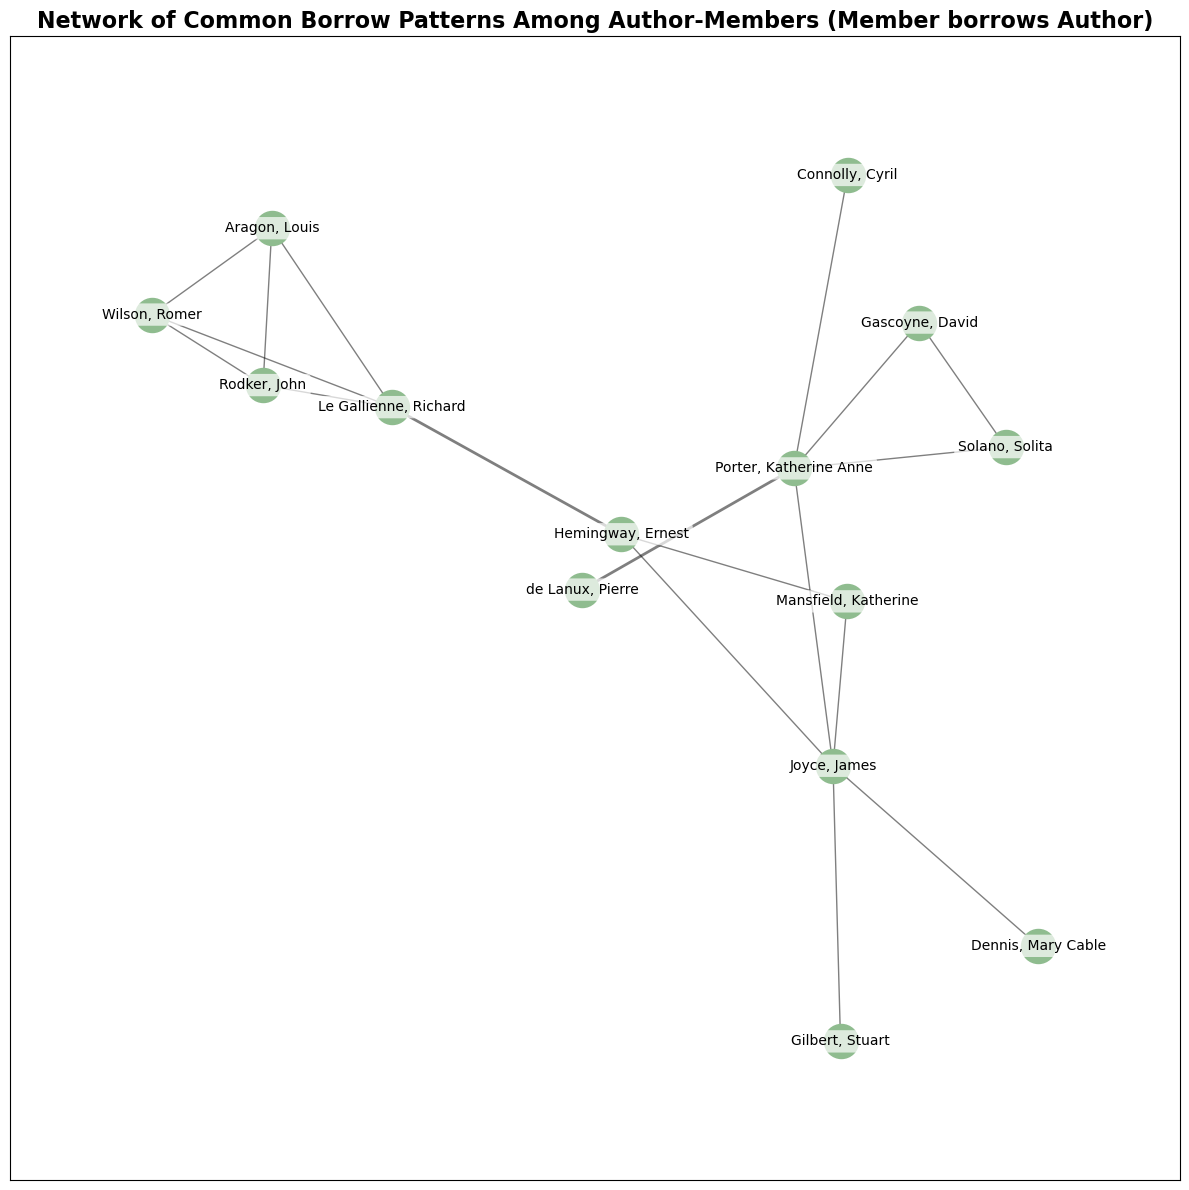

In [158]:
# Network visualization | Member borrows Member

plot_network(member_borrows_member_graph, use_weight=True, k=0.67, titleAdd='Network of Common Borrow Patterns Among Author-Members (Member borrows Author)', node_color='darkseagreen', figure_name='member_borrows_member')

In [159]:
def plot_graph_metric(metric_dict, x_label, y_label, title=None, rotation=90, ylim=None, figure_name=None):
    """
    Plots a bar chart for a given graph metric.

    Parameters:
    metric_dict (dict): A dictionary where keys are nodes and values are the metric to plot.
    x_label (str): Label for the x-axis.
    y_label (str): Label for the y-axis.
    title (str, optional): Title of the plot. Defaults to None.
    rotation (int, optional): Rotation angle for x-axis labels. Defaults to 90.
    ylim (tuple, optional): Limits for the y-axis. Defaults to None.

    Returns:
    None
    """
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(metric_dict)), list(metric_dict.values()), align='center', color='cornflowerblue')
    plt.xticks(range(len(metric_dict)), list(metric_dict.keys()), rotation=rotation)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim:
        plt.ylim(ylim)
    else:
        plt.ylim(0, max(metric_dict.values()) + 1)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tight_layout()

    plt.savefig(f'../data/processed/figure-images/04_bar_{figure_name}.png',bbox_inches='tight')
    plt.show()

def plot_side_by_side_graph_metrics(weighted_dict, unweighted_dict, x_label, y_label, title=None, rotation=90, ylim=None, figure_name=None):
    """
    Plots a side-by-side bar chart for weighted and unweighted graph metrics.

    Parameters:
    weighted_dict (dict): A dictionary where keys are nodes and values are the weighted degree.
    unweighted_dict (dict): A dictionary where keys are nodes and values are the unweighted degree.
    x_label (str): Label for the x-axis.
    y_label (str): Label for the y-axis.
    title (str, optional): Title of the plot. Defaults to None.
    rotation (int, optional): Rotation angle for x-axis labels. Defaults to 90.
    ylim (tuple, optional): Limits for the y-axis. Defaults to None.

    Returns:
    None
    """
    nodes = list(weighted_dict.keys())  # Assumes both dictionaries have the same keys
    weighted_values = [weighted_dict[node] for node in nodes]
    unweighted_values = [unweighted_dict[node] for node in nodes]

    x = np.arange(len(nodes))  # X positions for the nodes
    width = 0.4  # Width of each bar

    plt.figure(figsize=(12, 6))

    # Plot the unweighted and weighted degrees
    unweighted_bars = plt.bar(x - width / 2, unweighted_values, width=width, label='Unweighted Degree', color='lightblue')
    weighted_bars = plt.bar(x + width / 2, weighted_values, width=width, label='Weighted Degree', color='cornflowerblue')

    # Add labels and title
    plt.xticks(x, nodes, rotation=rotation)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim:
        plt.ylim(ylim)
    else:
        plt.ylim(0, max(max(weighted_values), max(unweighted_values)) + 1)
    plt.title(title, fontsize=16, fontweight='bold')

    plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    # Legend
    plt.legend(handles=[unweighted_bars, weighted_bars])

    plt.tight_layout()

    plt.savefig(f'../data/processed/figure-images/04_bar_{figure_name}.png',bbox_inches='tight')
    plt.show()


Now the weighted and unweighted degree centrality is calculated.

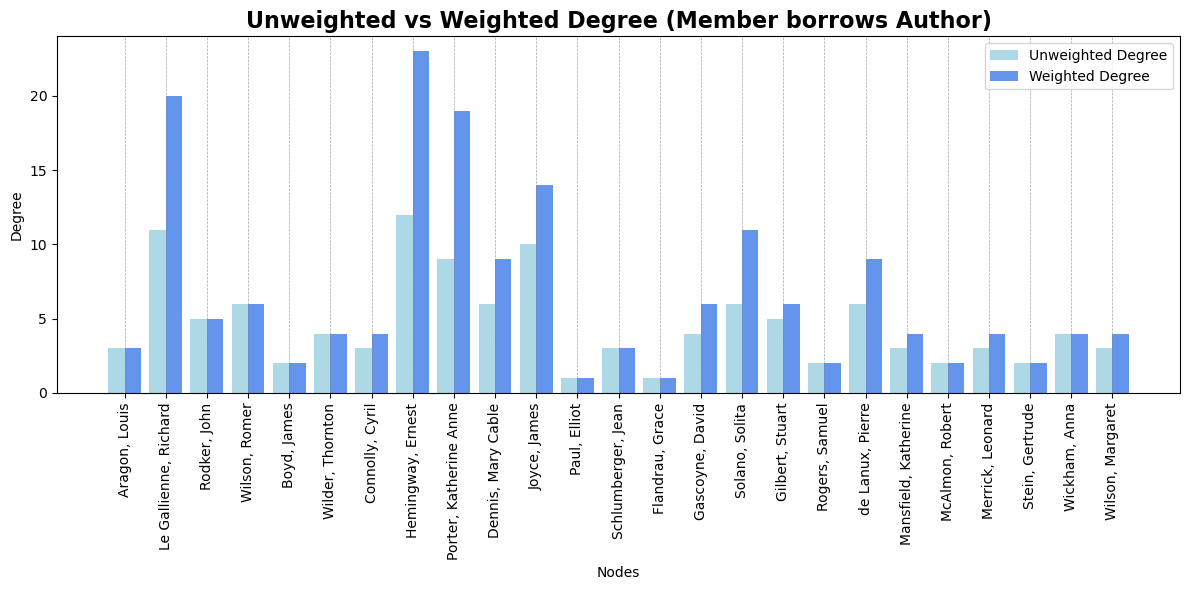

In [160]:
# Degree distribution | Member borrows Author

member_borrows_author_weighted_degree = dict(member_borrows_author_graph.degree(weight="weight"))
member_borrows_author_unweighted_degree = dict(member_borrows_author_graph.degree())

plot_side_by_side_graph_metrics(member_borrows_author_weighted_degree,
                                member_borrows_author_unweighted_degree,
                                x_label="Nodes",
                                y_label="Degree",
                                title="Unweighted vs Weighted Degree (Member borrows Author)",
                                rotation=90,
                                figure_name='member_borrows_author_degree')

In [161]:
# Weighted Degree | Member borrows Author

print('Weighted Degree:',sorted(member_borrows_author_weighted_degree.items(), key=lambda x:x[1]))

Weighted Degree: [('Paul, Elliot', 1), ('Flandrau, Grace', 1), ('Boyd, James', 2), ('Rogers, Samuel', 2), ('McAlmon, Robert', 2), ('Stein, Gertrude', 2), ('Aragon, Louis', 3), ('Schlumberger, Jean', 3), ('Wilder, Thornton', 4), ('Connolly, Cyril', 4), ('Mansfield, Katherine', 4), ('Merrick, Leonard', 4), ('Wickham, Anna', 4), ('Wilson, Margaret', 4), ('Rodker, John', 5), ('Wilson, Romer', 6), ('Gascoyne, David', 6), ('Gilbert, Stuart', 6), ('Dennis, Mary Cable', 9), ('de Lanux, Pierre', 9), ('Solano, Solita', 11), ('Joyce, James', 14), ('Porter, Katherine Anne', 19), ('Le Gallienne, Richard', 20), ('Hemingway, Ernest', 23)]


In [162]:
# Unweighted Degree | Member borrows Author

print('Unweighted Degree:',sorted(member_borrows_author_unweighted_degree.items(), key=lambda x:x[1]))

Unweighted Degree: [('Paul, Elliot', 1), ('Flandrau, Grace', 1), ('Boyd, James', 2), ('Rogers, Samuel', 2), ('McAlmon, Robert', 2), ('Stein, Gertrude', 2), ('Aragon, Louis', 3), ('Connolly, Cyril', 3), ('Schlumberger, Jean', 3), ('Mansfield, Katherine', 3), ('Merrick, Leonard', 3), ('Wilson, Margaret', 3), ('Wilder, Thornton', 4), ('Gascoyne, David', 4), ('Wickham, Anna', 4), ('Rodker, John', 5), ('Gilbert, Stuart', 5), ('Wilson, Romer', 6), ('Dennis, Mary Cable', 6), ('Solano, Solita', 6), ('de Lanux, Pierre', 6), ('Porter, Katherine Anne', 9), ('Joyce, James', 10), ('Le Gallienne, Richard', 11), ('Hemingway, Ernest', 12)]


Then the degrees for the 'Member borrows Member' graph are calculated.

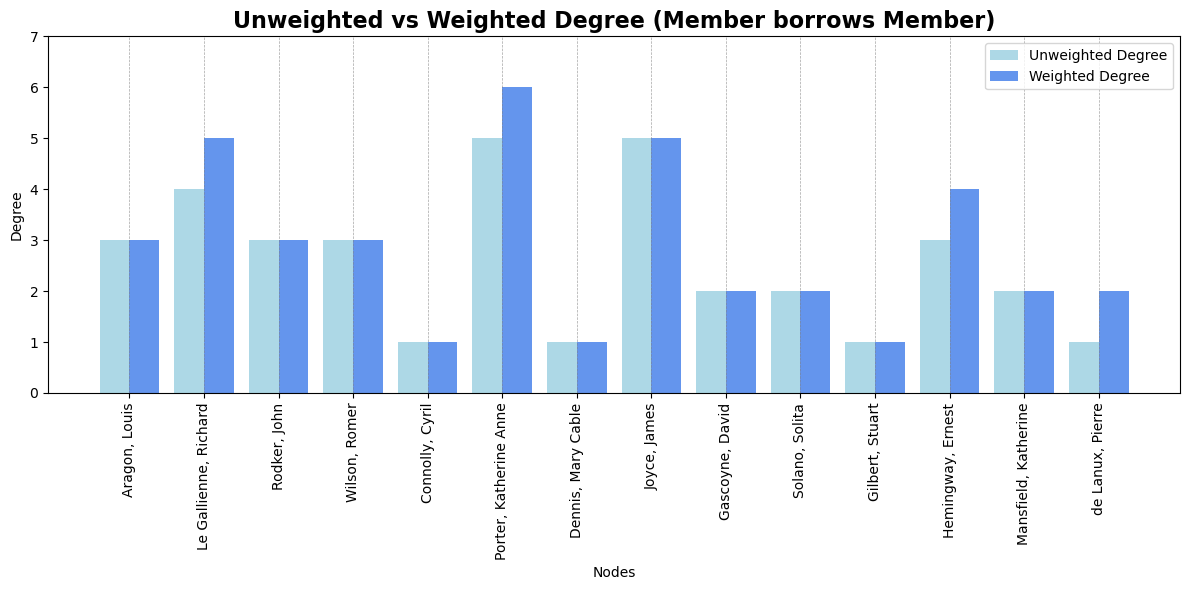

In [163]:
# Degree distribution | Member borrows Member

member_borrows_member_weighted_degree = dict(member_borrows_member_graph.degree(weight="weight"))
member_borrows_member_unweighted_degree = dict(member_borrows_member_graph.degree())

plot_side_by_side_graph_metrics(member_borrows_member_weighted_degree,
                                member_borrows_member_unweighted_degree,
                                x_label="Nodes",
                                y_label="Degree",
                                title="Unweighted vs Weighted Degree (Member borrows Member)",
                                rotation=90,
                                figure_name='member_borrows_member_degree')

In [164]:
# Weighted Degree | Member borrows Member

print('Weighted Degree:',sorted(member_borrows_member_weighted_degree.items(), key=lambda x:x[1]))

Weighted Degree: [('Connolly, Cyril', 1), ('Dennis, Mary Cable', 1), ('Gilbert, Stuart', 1), ('Gascoyne, David', 2), ('Solano, Solita', 2), ('Mansfield, Katherine', 2), ('de Lanux, Pierre', 2), ('Aragon, Louis', 3), ('Rodker, John', 3), ('Wilson, Romer', 3), ('Hemingway, Ernest', 4), ('Le Gallienne, Richard', 5), ('Joyce, James', 5), ('Porter, Katherine Anne', 6)]


In [165]:
# Unweighted Degree | Member borrows Member

print('Unweighted Degree:',sorted(member_borrows_member_unweighted_degree.items(), key=lambda x:x[1]))

Unweighted Degree: [('Connolly, Cyril', 1), ('Dennis, Mary Cable', 1), ('Gilbert, Stuart', 1), ('de Lanux, Pierre', 1), ('Gascoyne, David', 2), ('Solano, Solita', 2), ('Mansfield, Katherine', 2), ('Aragon, Louis', 3), ('Rodker, John', 3), ('Wilson, Romer', 3), ('Hemingway, Ernest', 3), ('Le Gallienne, Richard', 4), ('Porter, Katherine Anne', 5), ('Joyce, James', 5)]


#### Clustering Coefficient

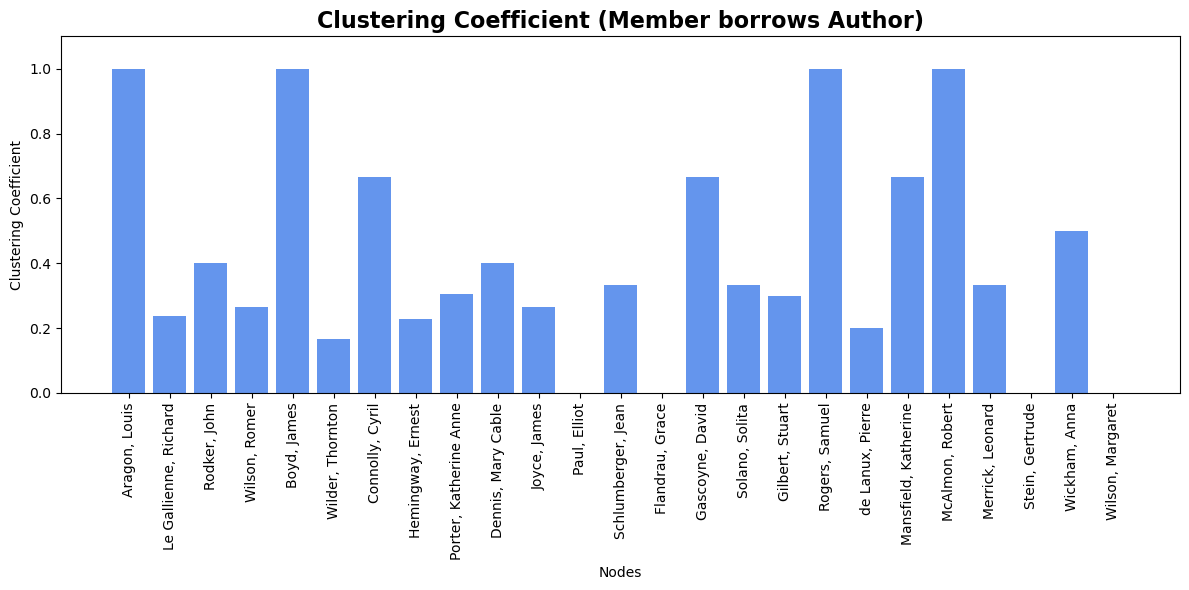

In [166]:
# Clustering Coefficient | Member borrows Author

member_borrows_author_coefficient = nx.clustering(member_borrows_author_graph)
plot_graph_metric(member_borrows_author_coefficient, x_label="Nodes", y_label="Clustering Coefficient", title="Clustering Coefficient (Member borrows Author)", ylim=(0, 1.1), figure_name='member_borrows_author_coefficient')  

In [167]:
# Clustering Coefficient | Member borrows Author

print('Clustering coefficient:', member_borrows_author_coefficient)

Clustering coefficient: {'Aragon, Louis': 1.0, 'Le Gallienne, Richard': 0.23636363636363636, 'Rodker, John': 0.4, 'Wilson, Romer': 0.26666666666666666, 'Boyd, James': 1.0, 'Wilder, Thornton': 0.16666666666666666, 'Connolly, Cyril': 0.6666666666666666, 'Hemingway, Ernest': 0.22727272727272727, 'Porter, Katherine Anne': 0.3055555555555556, 'Dennis, Mary Cable': 0.4, 'Joyce, James': 0.26666666666666666, 'Paul, Elliot': 0, 'Schlumberger, Jean': 0.3333333333333333, 'Flandrau, Grace': 0, 'Gascoyne, David': 0.6666666666666666, 'Solano, Solita': 0.3333333333333333, 'Gilbert, Stuart': 0.3, 'Rogers, Samuel': 1.0, 'de Lanux, Pierre': 0.2, 'Mansfield, Katherine': 0.6666666666666666, 'McAlmon, Robert': 1.0, 'Merrick, Leonard': 0.3333333333333333, 'Stein, Gertrude': 0, 'Wickham, Anna': 0.5, 'Wilson, Margaret': 0}


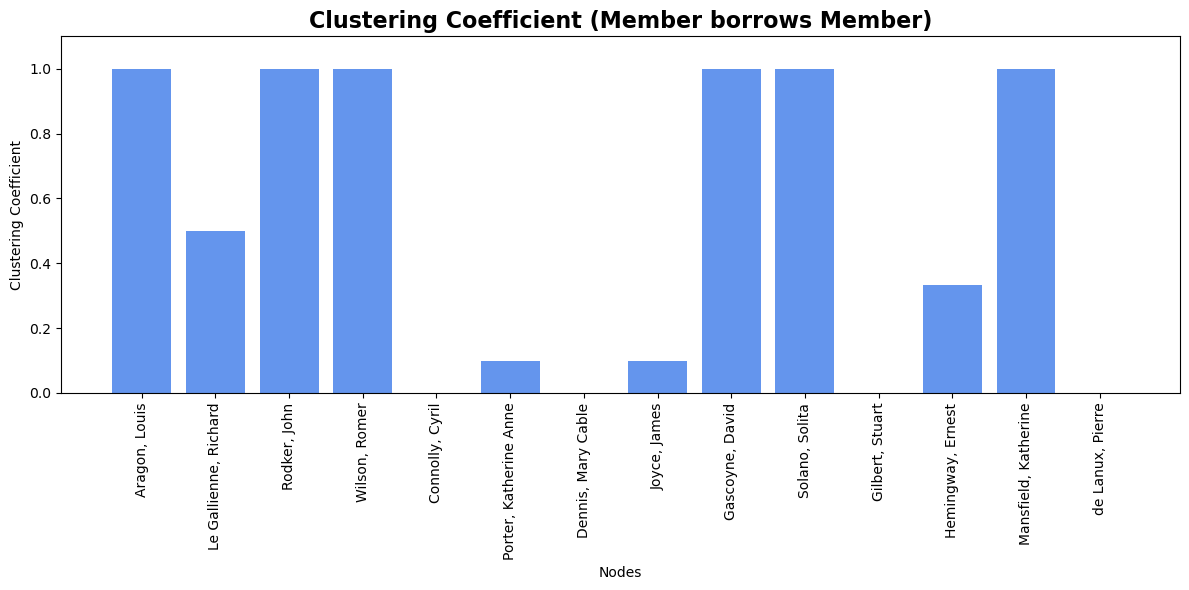

In [168]:
# Clustering Coefficient | Member borrows Member

member_borrows_member_coefficient = nx.clustering(member_borrows_member_graph)
plot_graph_metric(member_borrows_member_coefficient, x_label="Nodes", y_label="Clustering Coefficient", title="Clustering Coefficient (Member borrows Member)", ylim=(0, 1.1), figure_name='member_borrows_member_coefficient')  

In [169]:
# Clustering Coefficient | Member borrows Member

print('Clustering Coefficient:',member_borrows_author_coefficient)

Clustering Coefficient: {'Aragon, Louis': 1.0, 'Le Gallienne, Richard': 0.23636363636363636, 'Rodker, John': 0.4, 'Wilson, Romer': 0.26666666666666666, 'Boyd, James': 1.0, 'Wilder, Thornton': 0.16666666666666666, 'Connolly, Cyril': 0.6666666666666666, 'Hemingway, Ernest': 0.22727272727272727, 'Porter, Katherine Anne': 0.3055555555555556, 'Dennis, Mary Cable': 0.4, 'Joyce, James': 0.26666666666666666, 'Paul, Elliot': 0, 'Schlumberger, Jean': 0.3333333333333333, 'Flandrau, Grace': 0, 'Gascoyne, David': 0.6666666666666666, 'Solano, Solita': 0.3333333333333333, 'Gilbert, Stuart': 0.3, 'Rogers, Samuel': 1.0, 'de Lanux, Pierre': 0.2, 'Mansfield, Katherine': 0.6666666666666666, 'McAlmon, Robert': 1.0, 'Merrick, Leonard': 0.3333333333333333, 'Stein, Gertrude': 0, 'Wickham, Anna': 0.5, 'Wilson, Margaret': 0}


#### Diameter, Density, Average Shortest Path Length

In [170]:
# Density | Member borrows Author
member_borrows_author_density = nx.density(member_borrows_author_graph)

print('Density:',member_borrows_author_density)

Density: 0.19333333333333333


In [171]:
# Density | Member borrows Member
member_borrows_member_density = nx.density(member_borrows_member_graph)

print('Density:',member_borrows_member_density)

Density: 0.1978021978021978


In [172]:
# Diameter | Member borrows Author
member_borrows_author_diameter = nx.diameter(member_borrows_author_graph)

print('Diameter:',member_borrows_author_diameter)

Diameter: 4


In [173]:
# Diameter | Member borrows Member
member_borrows_member_diameter = nx.diameter(member_borrows_member_graph)

print('Diameter',member_borrows_member_diameter)

Diameter 5


In [174]:
# Average shortest path length | Member borrows Author
member_borrows_author_shortest_path = nx.average_shortest_path_length(member_borrows_author_graph)

print('Average shortest path length:',member_borrows_author_shortest_path)

Average shortest path length: 2.1733333333333333


In [175]:
# Average shortest path length | Member borrows Member
member_borrows_member_shortest_path = nx.average_shortest_path_length(member_borrows_member_graph)

print('Average shortest path length:',member_borrows_member_shortest_path)

Average shortest path length: 2.758241758241758


#### Assortativity and Average Clustering Coefficient

In [176]:
# Assortativity | Member borrows Author
member_borrows_author_assortativity = nx.assortativity.degree_assortativity_coefficient(member_borrows_author_graph)

print('Assortativity',member_borrows_author_assortativity)

Assortativity -0.22988687187582266


In [177]:
# Assortativity | Member borrows Member
member_borrows_member_assortativity = nx.assortativity.degree_assortativity_coefficient(member_borrows_member_graph)

print('Assortativity',member_borrows_member_assortativity)

Assortativity -0.5817223198594034


In [178]:
# Average clustering coefficient | Member borrows Author
member_borrows_author_average_clustering = nx.average_clustering(member_borrows_author_graph)
print('Average clustering coefficient:',member_borrows_author_average_clustering)

Average clustering coefficient: 0.4107676767676767


In [179]:
# Average clustering coefficient | Member borrows Member
member_borrows_member_average_clustering = nx.average_clustering(member_borrows_member_graph)
print('Average clustering coefficient:',member_borrows_member_average_clustering)

Average clustering coefficient: 0.5023809523809524


#### Small World

In [180]:
# Small-worldness | Member borrows Author

member_borrows_author_small_world = member_borrows_author_average_clustering/member_borrows_author_shortest_path

print('Small world:', member_borrows_author_small_world)

member_borrows_author_sigma = nx.algorithms.smallworld.sigma(member_borrows_author_graph,niter=10,nrand=5) # Note: the sigma value is calculated using 10 iterations and 5 randomizations -> output values differ each time the function is called

print('Sigma value:', member_borrows_author_sigma)

Small world: 0.18900353225506597
Sigma value: 1.0794252069008112


In [181]:
# Small-worldness | Member borrows Member

member_borrows_member_small_world = member_borrows_member_average_clustering/member_borrows_member_shortest_path

print('Small world:',member_borrows_member_small_world)

member_borrows_member_sigma = nx.algorithms.smallworld.sigma(member_borrows_member_graph,niter=10,nrand=5) # Note: the sigma value is calculated using 10 iterations and 5 randomizations -> output values differ each time the function is called

print('Sigma value:',member_borrows_member_sigma)

Small world: 0.18213811420982737
Sigma value: 1.7028357159596907


#### Cliques

In [182]:
# Cliques | Member borrows Author

member_borrows_author_clique = list(nx.clique.find_cliques(member_borrows_author_graph))
print('Number of cliques:', len(member_borrows_author_clique))
print('Maximum clique:', max(member_borrows_author_clique, key=len))
print('All cliques:', member_borrows_author_clique)

Number of cliques: 34
Maximum clique: ['Aragon, Louis', 'Le Gallienne, Richard', 'Rodker, John', 'Wilson, Romer']
All cliques: [['Aragon, Louis', 'Le Gallienne, Richard', 'Rodker, John', 'Wilson, Romer'], ['Paul, Elliot', 'Dennis, Mary Cable'], ['Rogers, Samuel', 'Porter, Katherine Anne', 'Gilbert, Stuart'], ['Boyd, James', 'Wilder, Thornton', 'Wilson, Romer'], ['Gilbert, Stuart', 'Porter, Katherine Anne', 'de Lanux, Pierre'], ['Gilbert, Stuart', 'Porter, Katherine Anne', 'Joyce, James'], ['Gilbert, Stuart', 'Rodker, John'], ['Wilder, Thornton', 'Joyce, James'], ['Wilder, Thornton', 'de Lanux, Pierre'], ['Hemingway, Ernest', 'Mansfield, Katherine', 'Joyce, James'], ['Hemingway, Ernest', 'de Lanux, Pierre', 'Porter, Katherine Anne'], ['Hemingway, Ernest', 'de Lanux, Pierre', 'Wickham, Anna'], ['Hemingway, Ernest', 'Porter, Katherine Anne', 'Gascoyne, David'], ['Hemingway, Ernest', 'Porter, Katherine Anne', 'Connolly, Cyril'], ['Hemingway, Ernest', 'Porter, Katherine Anne', 'Joyce, James

In [183]:
# Cliques | Member borrows Member

member_borrows_member_clique = list(nx.clique.find_cliques(member_borrows_member_graph))
print('Number of cliques:', len(member_borrows_member_clique))
print('Maximum clique:', max(member_borrows_member_clique, key=len))
print('All cliques:', member_borrows_member_clique)

Number of cliques: 9
Maximum clique: ['Le Gallienne, Richard', 'Aragon, Louis', 'Rodker, John', 'Wilson, Romer']
All cliques: [['Mansfield, Katherine', 'Joyce, James', 'Hemingway, Ernest'], ['Porter, Katherine Anne', 'Gascoyne, David', 'Solano, Solita'], ['Porter, Katherine Anne', 'Connolly, Cyril'], ['Porter, Katherine Anne', 'de Lanux, Pierre'], ['Porter, Katherine Anne', 'Joyce, James'], ['Le Gallienne, Richard', 'Aragon, Louis', 'Rodker, John', 'Wilson, Romer'], ['Le Gallienne, Richard', 'Hemingway, Ernest'], ['Gilbert, Stuart', 'Joyce, James'], ['Dennis, Mary Cable', 'Joyce, James']]


#### Communities

“there are more links within a community than to nodes
outside of it”

##### Label propagation

In [184]:
def get_node_colors_by_clustering(graph, clustering_algorithm):
    """
    Applies a clustering algorithm to the graph and returns node colors.

    Parameters:
    - graph (networkx.Graph): The input graph.
    - clustering_algorithm (function): The clustering algorithm to apply. 
      It should return a list of sets, where each set contains the nodes in a cluster.

    Returns:
    - list: A list of colors (one per node) representing cluster membership.
    """
    communities = list(clustering_algorithm(graph))  # Apply the clustering algorithm
    community_map = {node: idx for idx, community in enumerate(communities) for node in community}
    return [community_map[node] for node in graph.nodes()]

##### Louvain

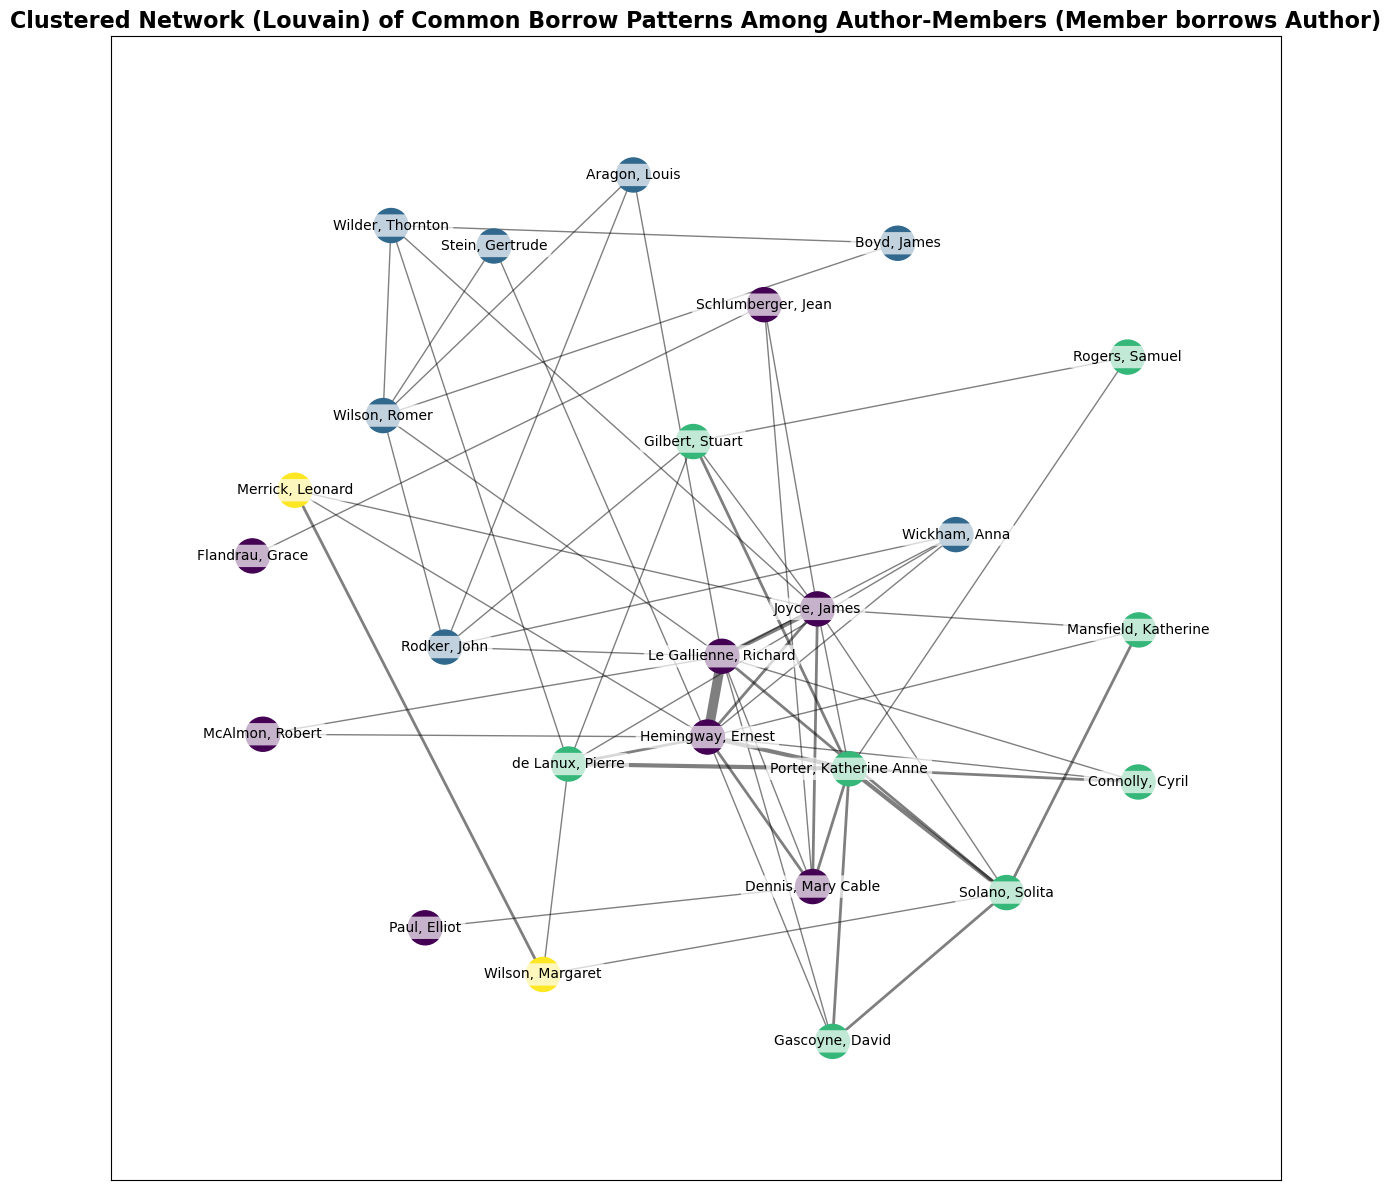

In [185]:
# Clustering with Louvain
member_borrows_author_louvain = get_node_colors_by_clustering(member_borrows_author_graph, nx.community.louvain_communities)

# Plot with Louvain
plot_network(member_borrows_author_graph, titleAdd='Clustered Network (Louvain) of Common Borrow Patterns Among Author-Members (Member borrows Author)', k=1.7,node_color=member_borrows_author_louvain, figure_name='member_borrows_author_louvain')

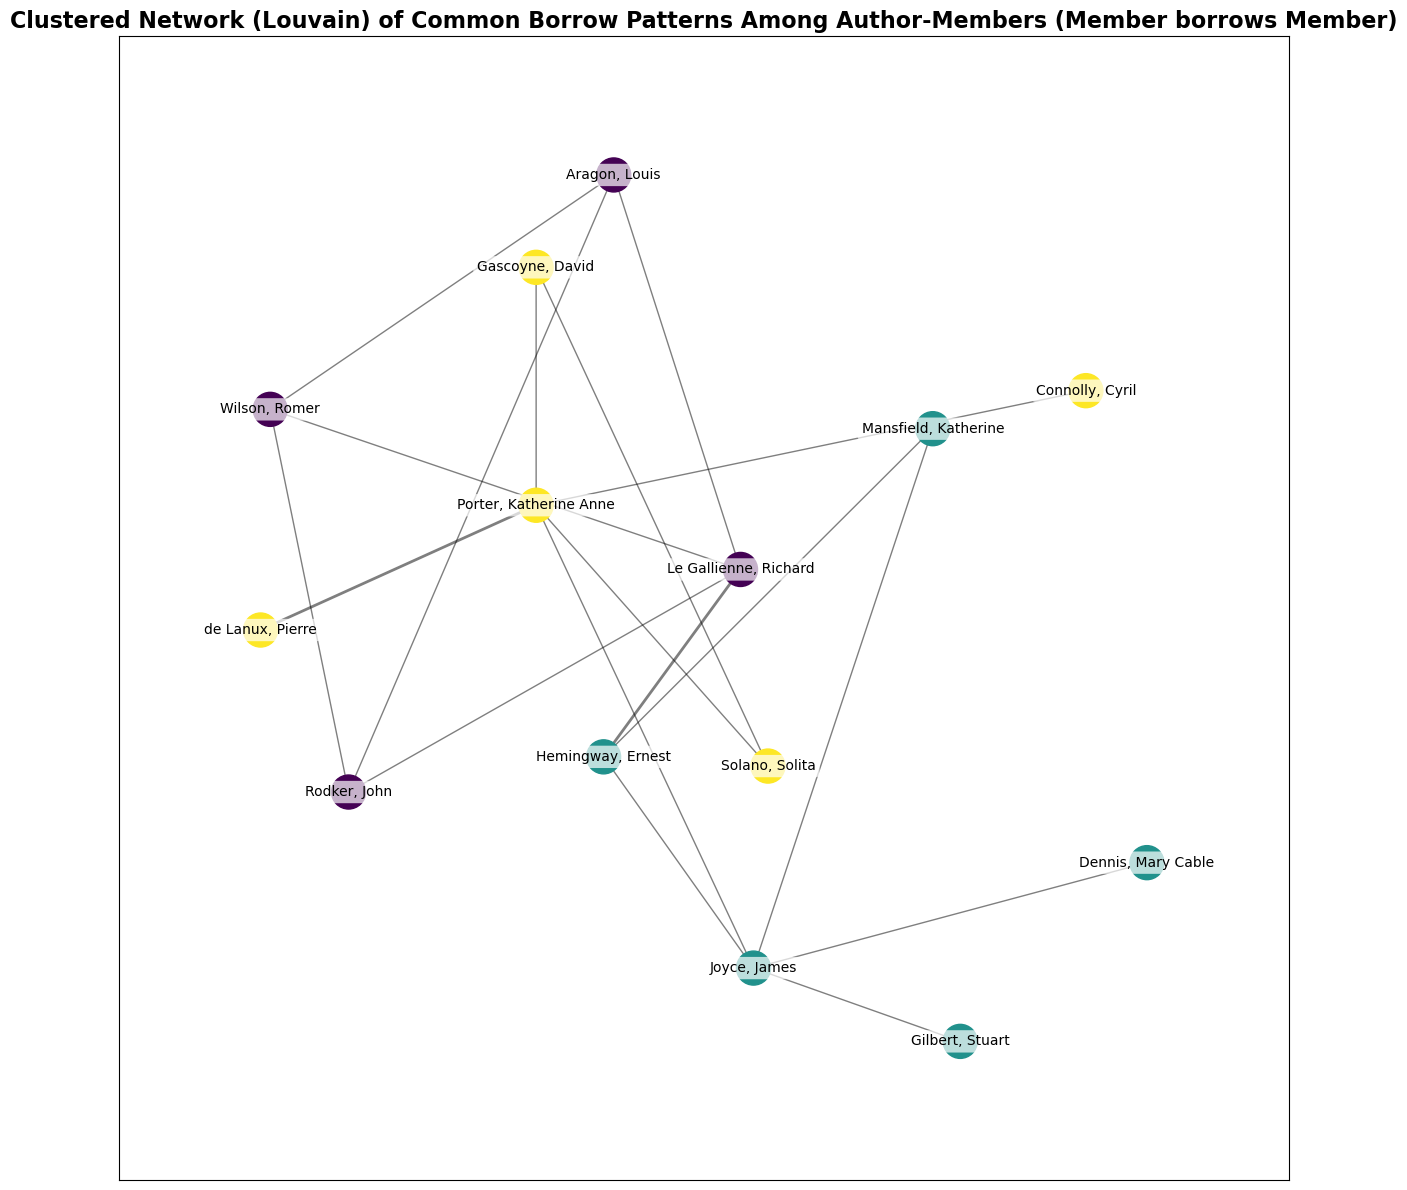

In [186]:
# Clustering with Louvain
member_borrows_member_louvain = get_node_colors_by_clustering(member_borrows_member_graph, nx.community.louvain_communities)

# Plot with Louvain
plot_network(member_borrows_member_graph, titleAdd='Clustered Network (Louvain) of Common Borrow Patterns Among Author-Members (Member borrows Member)', k=1.7,node_color=member_borrows_member_louvain, figure_name='member_borrows_member_louvain')

#### Network Graph: Books and Author-Members

In [187]:
def create_edge_list(pivot_table, min_borrow_count=1):
    """
    Converts a pivot table to an edge list and filters out books borrowed less than a specified number of times.

    Parameters:
    pivot_table (pd.DataFrame): A pivot table with members and items.
    min_borrow_count (int): Minimum number of times a book should be borrowed to be included. Default is 1.

    Returns:
    pd.DataFrame: Filtered edge list.
    """
    edge_list = pivot_table.stack().reset_index()
    edge_list.columns = ['member_sort_names', 'item_title', 'borrowed']
    edge_list = edge_list[edge_list['borrowed'] > 0]
    
    # Filter books borrowed more than `min_borrow_count` times
    book_counts = edge_list['item_title'].value_counts()
    books_multi_borrowed = book_counts[book_counts > min_borrow_count].index
    edge_list = edge_list[edge_list['item_title'].isin(books_multi_borrowed)]
    
    return edge_list

def build_graph(edge_list):
    """
    Builds a graph from an edge list.

    Parameters:
    edge_list (pd.DataFrame): DataFrame containing source and target nodes.

    Returns:
    networkx.Graph: Generated graph.
    """
    return nx.from_pandas_edgelist(edge_list, source='item_title', target='member_sort_names', create_using=nx.Graph())

def assign_node_colors(graph, item_nodes, item_color='lightsteelblue', member_color='darkorange'):
    """
    Assigns colors to nodes based on their type (item or member).

    Parameters:
    graph (networkx.Graph): The graph containing nodes.
    item_nodes (set): A set of item nodes to be colored.
    item_color (str): Color for item nodes. Default is 'lightsteelblue'.
    member_color (str): Color for member nodes. Default is 'darkorange'.

    Returns:
    list: List of colors corresponding to each node in the graph.
    """
    return [item_color if node in item_nodes else member_color for node in graph]

c:\Users\dittm\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


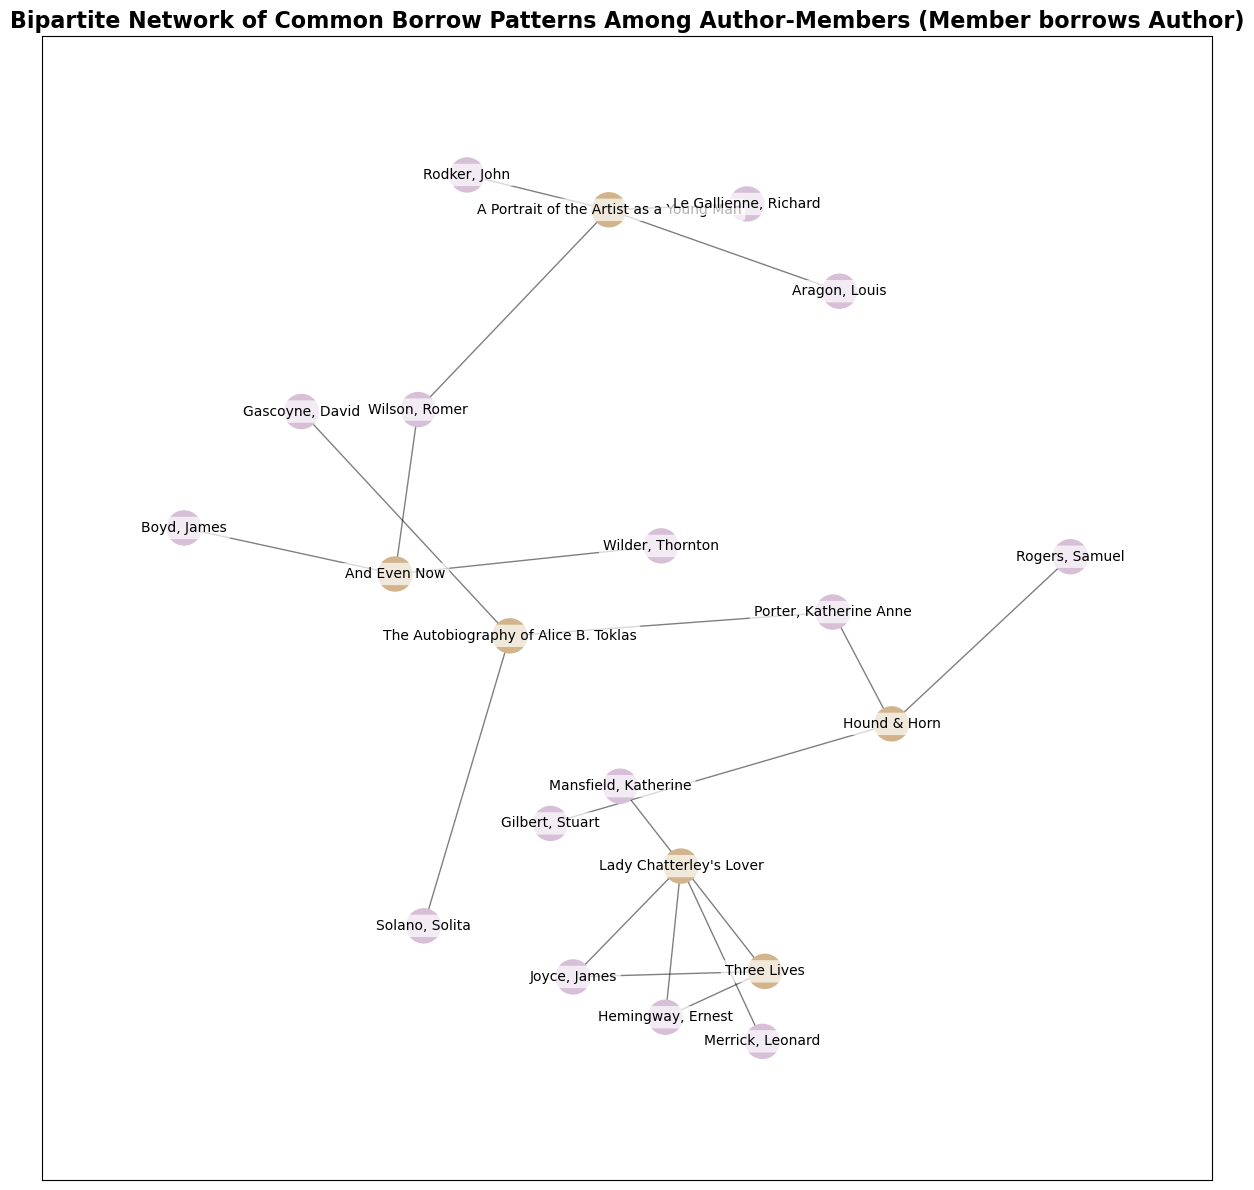

In [188]:
# Bipartite graph | Member borrows Author

# Generate the edge list and graph
member_borrows_author_edge_list = create_edge_list(member_borrows_author_matrix, min_borrow_count=2)
member_borrows_author_edge_graph = build_graph(member_borrows_author_edge_list)

# Generate node colors
member_borrows_author_node_colors = assign_node_colors(
    member_borrows_author_edge_graph, 
    item_nodes=set(member_borrows_author_edge_list['item_title'].unique()), 
    item_color='tan', 
    member_color='thistle'
)

plot_network(
    member_borrows_author_edge_graph, 
    use_weight=False,  # Set to True if edge weights are to be used; for this graph, we only need the structure
    k=0.88,  # Adjust as necessary for optimal layout
    titleAdd='Bipartite Network of Common Borrow Patterns Among Author-Members (Member borrows Author)', 
    node_color=member_borrows_author_node_colors,  # Pass the computed node colors
    figure_name='member_borrows_author_bipartite'
)

c:\Users\dittm\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


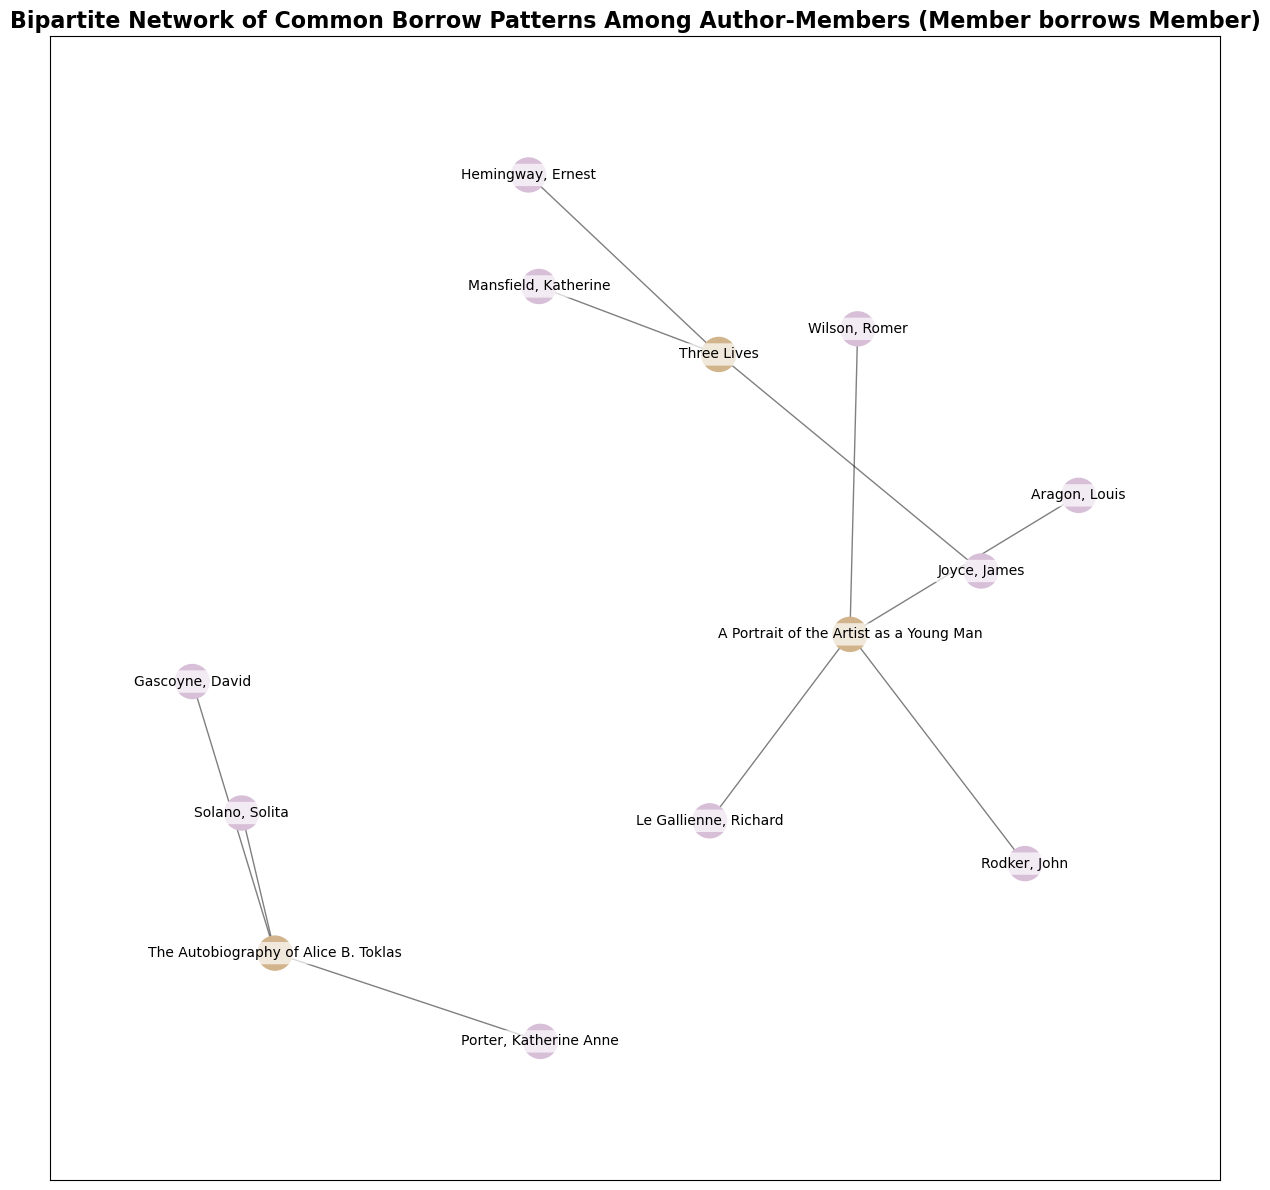

In [189]:
# Bipartite graph | Member borrows Member

# Generate the edge list and graph
member_borrows_member_edge_list = create_edge_list(member_borrows_member_matrix, min_borrow_count=2)
member_borrows_member_edge_graph = build_graph(member_borrows_member_edge_list)

# Generate node colors
member_borrows_member_node_colors = assign_node_colors(
    member_borrows_member_edge_graph, 
    item_nodes=set(member_borrows_member_edge_list['item_title'].unique()), 
    item_color='tan', 
    member_color='thistle'
)

plot_network(
    member_borrows_member_edge_graph, 
    use_weight=False,  # Set to True if edge weights are to be used; for this graph, we only need the structure
    k=0.88,  # Adjust as necessary for optimal layout
    titleAdd='Bipartite Network of Common Borrow Patterns Among Author-Members (Member borrows Member)', 
    node_color=member_borrows_member_node_colors,  # Pass the computed node colors
    figure_name='member_borrows_member_bipartite'
)